In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

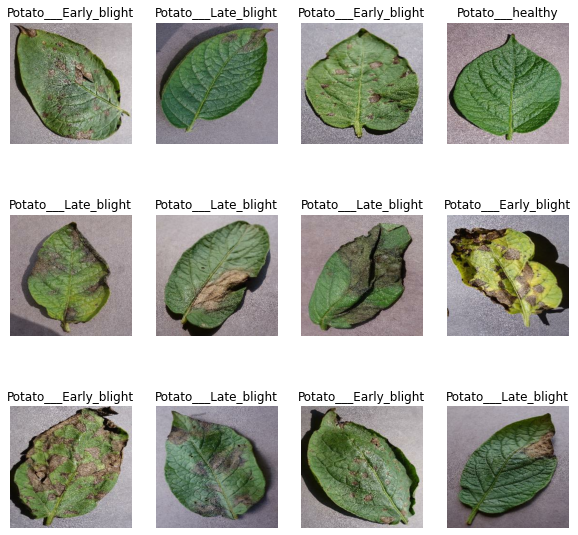

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1): 
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])#print title from class_names of label_batch no. 0
        plt.axis("off")
    #print(image_batch[0].shape) #prints length heigth and channels 

In [7]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_ds = dataset.take(54) #taking first 54 batches
len(train_ds)

54

In [9]:
test_ds = dataset.skip(54) # taking the remaining batches
len(test_ds)

14

In [10]:
val_size=0.1 
len(dataset)*val_size

6.800000000000001

In [11]:
val_ds = test_ds.take(6) #taking 10% of the remaining for validation
len(val_ds)

6

In [12]:
test_ds = test_ds.skip(6)# taking the final 10% for testing
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size= int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)
len(val_ds)

6

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [17]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,  (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
) 

In [22]:
history = model.fit(
    train_ds,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
54/54 [==============================] - 238s 4s/step - loss: 0.9086 - accuracy: 0.4850 - val_loss: 0.8536 - val_accuracy: 0.6094
Epoch 2/20
54/54 [==============================] - 214s 4s/step - loss: 0.6755 - accuracy: 0.6927 - val_loss: 0.5188 - val_accuracy: 0.7448
Epoch 3/20
54/54 [==============================] - 210s 4s/step - loss: 0.4238 - accuracy: 0.8316 - val_loss: 0.3516 - val_accuracy: 0.8542
Epoch 4/20
54/54 [==============================] - 214s 4s/step - loss: 0.3155 - accuracy: 0.8634 - val_loss: 0.2784 - val_accuracy: 0.8906
Epoch 5/20
54/54 [==============================] - 213s 4s/step - loss: 0.2365 - accuracy: 0.8976 - val_loss: 0.3104 - val_accuracy: 0.8802
Epoch 6/20
54/54 [==============================] - 213s 4s/step - loss: 0.2006 - accuracy: 0.9225 - val_loss: 0.1665 - val_accuracy: 0.9375
Epoch 7/20
54/54 [==============================] - 184s 3s/step - loss: 0.2105 - accuracy: 0.9144 - val_loss: 0.1893 - val_accuracy: 0.9323
Epoch 8/20
54

In [23]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 23s 713ms/step - loss: 0.1594 - accuracy: 0.9336


In [24]:
scores

[0.15937310457229614, 0.93359375]

In [25]:
history

In [26]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
history.history['accuracy']

[0.48495370149612427,
 0.6927083134651184,
 0.8315972089767456,
 0.8634259104728699,
 0.8975694179534912,
 0.9224537014961243,
 0.9143518805503845,
 0.9097222089767456,
 0.9438657164573669,
 0.9241898059844971,
 0.9484953880310059,
 0.9508101940155029,
 0.9652777910232544,
 0.9554398059844971,
 0.9606481194496155,
 0.9693287014961243,
 0.9594907164573669,
 0.953125,
 0.9548611044883728,
 0.9733796119689941]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

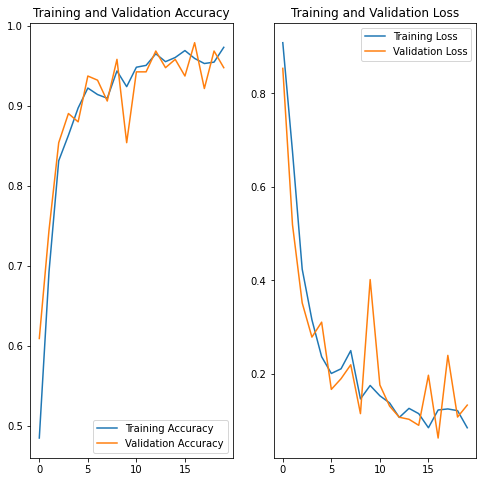

In [31]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(20), acc, label="Training Accuracy")
plt.plot(range(20), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(20), loss, label="Training Loss")
plt.plot(range(20), val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted label:  Potato___Late_blight


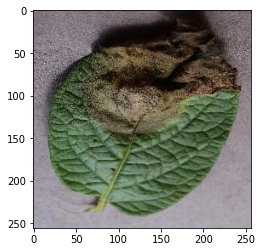

In [32]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    #batch_prediction contains all the images from image_batch 
    print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])
    # np.argmax returns the indices of maximum values along an axis

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)# create a batch
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *  (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 50ms/step


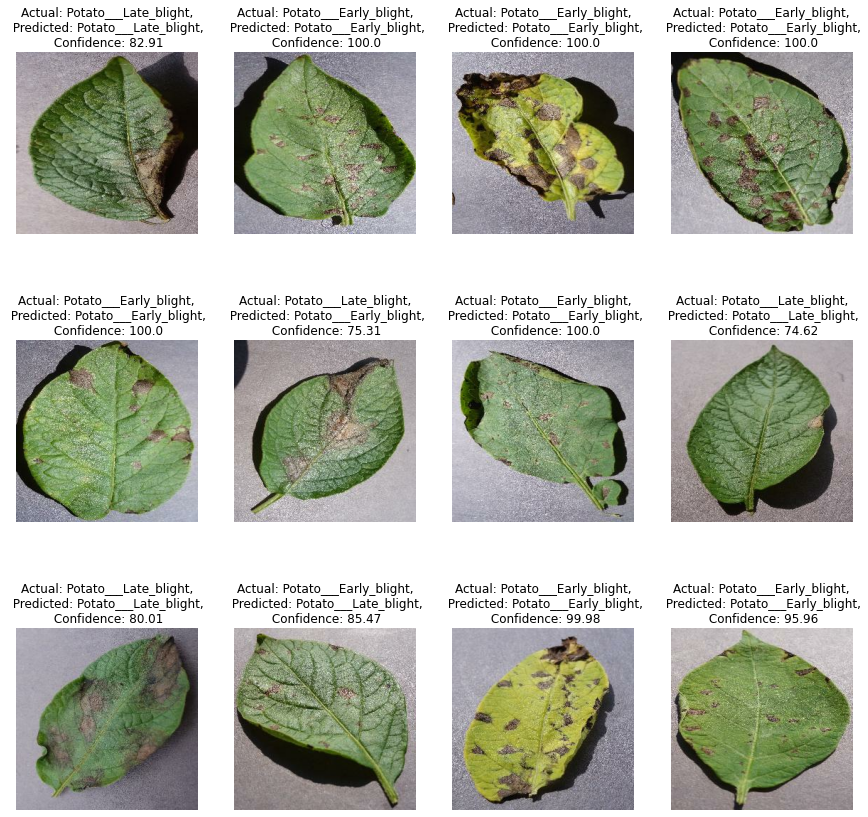

In [35]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")
        
        plt.axis('off')

In [35]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [37]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [36]:
model.save("../potatoesfinal.h5")